<div style="text-align: center;">
    <img src="Screenshot_2.png" alt="Orange Logo" width="100"/>
    <h1 style="color: orange;">MESURE DE L'EXPÉRIENCE CLIENT B2B CHEZ ORANGE</h1>
</div>

## <span style="color:red">Présentation de l'Organisme d'Accueil</span>

### <span style="color:blue">1.1 Orange</span>

Orange est l'un des principaux opérateurs de télécommunications dans le monde avec un chiffre d'affaires de 40,9 milliards d'euros en 2016. Présent dans 29 pays, le Groupe servait environ 263 millions de clients dans le Monde. Orange est également l'un des leaders mondiaux des services de télécommunications aux entreprises multinationales sous la marque Orange Business Services.

### <span style="color:blue">1.2 Département DTSE (Direction Technique Solution Entreprise)</span>

Le département DTSE est responsable de la conception, de la mise en œuvre et de la gestion des solutions techniques pour les clients entreprise d'Orange. Ce département joue un rôle crucial dans l'assurance de la qualité et de la continuité des services offerts aux clients B2B.

<div style="text-align: center;">
    <img src="Screenshot_1.png" alt="Département DTSE" style="width:50%;">
</div>

### <span style="color:blue">1.3 Équipe TAM (Technical Account Manager)</span>

L'équipe TAM est dédiée aux clients B2B premium. Chaque TAM est responsable de la gestion technique des comptes clients, assurant un suivi personnalisé et une résolution rapide des problèmes techniques. Les services offerts incluent :

- Assistance prioritaire
- Surveillance proactive
- Conseils techniques
- Personnalisation des solutions
- Planification stratégique

## <span style="color:red">Présentation du Cadre Général du Projet</span>

### <span style="color:blue">2.1 Mesure de l'Expérience Client B2B Orange</span>

L'expérience client B2B chez Orange se réfère aux perceptions et émotions ressenties par les entreprises et organisations lorsqu'elles interagissent avec les services de télécommunications offerts par Orange. Cette mesure est cruciale pour :

- Comprendre et améliorer la satisfaction et la fidélité des clients B2B.
- Augmenter la rétention des clients.
- Réduire le churn (taux de désabonnement).
- Améliorer la réputation de l'entreprise.

#### <span style="color:darkgreen">Service pour client B2B Chez Orange:</span>

Orange propose une gamme complète de services de télécommunications adaptés aux besoins des entreprises de toutes tailles, incluant :

- **DATA** : L2L, VPLS, IPVPN.
- **Internet** : Solutions de connectivité.
- **VOIX** : Services de téléphonie.
- **ICT** : Technologies de l'information et de la communication.
- **Hébergement** : Services de data centers.
- **Cloud** : Solutions de cloud computing.
- **Sécurité** : Services de cybersécurité.

#### <span style="color:darkgreen">Solutions Déjà Présentes dans le Marché</span>

Actuellement, la mesure de l'expérience client repose sur des indicateurs clés de performance (KPI) tels que :

- **Customer Satisfaction Score (CSAT)** : Mesure le contentement des clients.
- **Net Promoter Score (NPS)** : Évalue la probabilité que les clients recommandent les services.
- **Customer Effort Score (CES)** : Évalue l'effort requis par les clients pour obtenir et utiliser les services.

Ces KPIs sont principalement calculés à partir des retours clients obtenus via des surveys.

<div style="text-align: center;">
    <img src="Screenshot_4.png" alt="Solutions Présentes sur le Marché" style="width:50%;">
</div>

### <span style="color:blue">2.2 Problématique</span>

L'absence de feedback direct des clients via des enquêtes ou des surveys constitue la principale problématique de ce projet. En l'absence de ces données, il est nécessaire de se baser sur des données opérationnelles pour évaluer la satisfaction des clients, telles que :

- Les tickets de support.
- La disponibilité des services.
- Les résiliations de contrats.

### <span style="color:blue">2.3 Objectif du Projet</span>

Analyser les données pour déterminer la satisfaction des clients B2B d'Orange et prédire le churn. Les étapes incluent :

- **Analyse des tickets de support** : Comprendre les problèmes rencontrés par les clients.
- **Analyse de la disponibilité des services** : Évaluer la qualité de service.
- **Analyse des résiliations de contrats** : Identifier la tendance du churn.



## <span style="color:red">Méthodologie</span>

### <span style="color:blue">3.1 Processus de Travail</span>

<div style="text-align: center;">
    <img src="processus.png" alt="Processus de Travail" style="width:80%;">
</div>


## <span style="color:blue">Analyse des Données : Disponibilité des Services</span>

#### <span style="color:darkgreen">Importation des Bibliothèques</span>

In [149]:
# importing libraries(technologies utilisées)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
from IPython.display import display

#### <span style="color:darkgreen"> Chargement Nettoyage et Préparation des Données de Disponibilité :</span>

In [150]:
# Chargement des données de disponibilité
path = r'C:\Users\dell\Documents\Stage_2A_ORANGE\Report_Availability_-_This_Year.xlsx'
df = pd.read_excel(path, skiprows=2)
# Convertir 'Availability' de string à numérique en enlevant le signe de pourcentage et en convertissant en float
df['Availability'] = df['Availability'].str.replace(',', '.').str.rstrip('%').astype(float)

# Définir une fonction pour extraire l'ID de la colonne 'Node'
def extract_id_final(node):
    if isinstance(node, str):
        # Utiliser regex pour trouver les IDs commençant par MD, 5, 05, 000, ou 0000 suivis de chiffres
        match = re.search(r'(MD\d{4,}|5\d{4,}|05\d{3,}|000\d{4,}|0000\d{3,})', node)
        if match:
            return match.group(0)
    return None

# Définir une fonction pour extraire le nom du client de la colonne 'Node'
def extract_client_name(node):
    if isinstance(node, str):
        # Supposer que le nom du client précède l'ID dans le champ 'Node'
        match = re.search(r'(.+?)(MD\d{4,}|5\d{4,}|05\d{3,}|000\d{4,}|0000\d{3,})', node)
        if match:
            return match.group(1).strip()  # Enlever les espaces inutiles
    return None

# Appliquer les fonctions pour créer les nouvelles colonnes 'ID' et 'Client Name'
availability_data = df.copy()
availability_data['ID'] = availability_data['Node'].apply(extract_id_final)
availability_data['Client Name'] = availability_data['Node'].apply(extract_client_name)

# Supprimer les lignes sans 'ID'
availability_data = availability_data.dropna(subset=['ID'])
# Calculer la disponibilité moyenne pour chaque client
client_availability_mean = availability_data.groupby('Client Name')['Availability'].mean().reset_index()

# Renommer la colonne de disponibilité moyenne pour un meilleur contexte
client_availability_mean.rename(columns={'Availability': 'Average Availability'}, inplace=True)

# Joindre les données de disponibilité moyenne avec la DataFrame d'origine
availability_data = pd.merge(availability_data, client_availability_mean, on='Client Name', how='left')

# Afficher les informations dans des tableaux
print("\nPremières lignes du DataFrame:")
display(availability_data.head())



Premières lignes du DataFrame:


,Date,Node ID,Node,IP Address,Availability,ID,Client Name,Average Availability
0,juillet 2023,19224,AMENDIS_MANDRI_TETOUAN_VOIX_OXO_SW_ALCALTEL_5...,10.23.135.12,53.29,531980587,AMENDIS_MANDRI_TETOUAN_VOIX_OXO_SW_ALCALTEL_,8.881667
1,juillet 2023,19221,AMENDIS_MDIQ_TETOUAN_VOIX_OXO_SW_ALCALTEL_531...,10.251.26.36,64.72,531980617,AMENDIS_MDIQ_TETOUAN_VOIX_OXO_SW_ALCALTEL_,10.786667
2,juillet 2023,18123,AMENDIS-FNIDEQ-VOIX-OMNI-ALCATEL-531980500,10.251.114.196,93.48,531980500,AMENDIS-FNIDEQ-VOIX-OMNI-ALCATEL-,91.486667
3,juillet 2023,19763,BARID_AL_MAGHRIB_FQUIH_BEN_SALEH_IPVPN_128K_M...,10.43.146.40,99.97,MD0009271,BARID_AL_MAGHRIB_FQUIH_BEN_SALEH_IPVPN_128K_,98.318333
4,juillet 2023,19764,BARID_AL_MAGHRIB_KASBAT_TADLA_IPVPN_128K_MD00...,10.43.146.41,99.97,MD0009268,BARID_AL_MAGHRIB_KASBAT_TADLA_IPVPN_128K_,99.810000


#### <span style="color:darkgreen">Visualisation</span>

In [151]:
# Catégoriser les clients par disponibilité moyenne
conditions = [
    (client_availability_mean['Average Availability'] > 90),
    (client_availability_mean['Average Availability'] >= 80) & (client_availability_mean['Average Availability'] <= 90),
    (client_availability_mean['Average Availability'] < 80)
]
choices = ['>90%', '80-90%', '<80%']
client_availability_mean['Category'] = np.select(conditions, choices, default='Unknown')

# Calculer le nombre de clients par catégorie de disponibilité moyenne
availability_distribution = client_availability_mean['Category'].value_counts()

# Créer un bar plot avec Plotly
fig = px.bar(
    availability_distribution, 
    x=availability_distribution.index, 
    y=availability_distribution.values, 
    title='Nombre de Clients par Catégorie de Disponibilité Moyenne', 
    labels={'index':'Catégorie de Disponibilité', 'y':'Nombre de Clients'},
    color=availability_distribution.index,
    color_discrete_map={'>90%': 'green', '80-90%': 'orange', '<80%': 'red'}
)

fig.update_layout(
    xaxis_title='Catégorie de Disponibilité', 
    yaxis_title='Nombre de Clients', 
    template='plotly_white',
    title_x=0.5
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.update_layout(
    xaxis_title='Catégorie de Disponibilité', 
    yaxis_title='Nombre de Clients', 
    template='plotly_white',
    title_x=0.5,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(t=50, b=50, l=50, r=50),
    height=500,
    width=1000
)

fig.show()

### <span style="color:darkgreen">Interprétations des Résultats</span>

1. **Majorité des Clients avec une Disponibilité Supérieure à 90%** :
    - Le graphique montre que la majorité des clients ont une disponibilité supérieure à 90%. Cela indique que les services fournis par Orange sont généralement très fiables pour la plupart des clients.

2. **Clients avec une Disponibilité Inférieure à 80%** :
    - Il y a une proportion notable de clients avec une disponibilité inférieure à 80%. Ces clients peuvent rencontrer des problèmes de service fréquents, ce qui nécessite une attention particulière pour améliorer leur expérience.

3. **Transition Rapide entre les Catégories** :
    - La faible proportion de clients dans la catégorie 80-90% suggère qu'il y a peu de clients dont la disponibilité est intermédiaire. La transition semble être rapide entre une bonne et une mauvaise disponibilité.

## <span style="color:blue">Analyse des Données : Ticket </span>

#### <span style="color:darkgreen">Chargement des Données de Ticket </span>

In [152]:
# Lecture des données tickets
path = r'C:\Users\dell\Documents\Stage_2A_ORANGE\Base_B2B_2023.xlsx'
data = pd.read_excel(path, skiprows=3)
data.reset_index(drop=True, inplace=True)
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])


#### <span style="color:darkgreen">Nettoyage des Données et Feature Engineering</span>

In [153]:
# Colonnes à supprimer
columns_to_drop = [
    'GTR respectée ?', 'Etat', 'Durée de traitement (mn) GLOBAL', 'Durée gel (mn)', 
    'Durée de rétablissement (mn)', 'Acces Last Mile', 'Cause Retard GTR', 'RSP', 
    'Site client corresp. local 2', 'Type ticket', 'Type produit', 'Site Client',
    'Action de résolution', 'Description', 'Date rétablissement', 'Date clôture',
    'Date début ticket','Détail Service', 'N° ticket', 'Niveau Résolution', 'Year Cloture',
    'Week Cloture', 'Year Creation', 'Week Creation','DMS'
]

# Supprimer les colonnes présentes dans le DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(columns=existing_columns_to_drop)

# Définir les listes d'engagements premium et standard
premium_engagements = [
    'GTR S1 240 24h/24 - 7j/7', 'GTR S1 120 24h/24 - 7j/7', 
    'GTR S2 240 Renvoi permanent 24h/24 7j/7', 'GTR S2 240 Lundi au Dimanche 24/24 7/7', 
    'GTR HO 240 Renvoi permanent 24h/24 7j/7', 'GTR HO 240 22-24 LV 18-24 S 00-24 D'
]

standard_engagements = [
    'GTR HO 480 7h-18h L au V', 'GTR HO 480 Lundi au Vendredi 8h à 18h',
    'GTR S2 480 Lundi au Vendredi 8h à 18h', 'GTR HO 240 7h-18h L au V',
    'GTR HO 480 Lundi au Vendredi 9h à 18h', 'GTR S2 240 Lu au Ve 9h-17h + Sa 9h-13h',
    'GTR S2 480 Lu Ven 9h à 18h/Sa 9h-12h', 'GTR S2 480 Lundi au Samedi 8h à 18h',
    'GTR S2 480 7h-18h L au V', 'GTR S2 240 Lundi au Vendredi 8h à 18h',
    'GTR S2 480 Lundi au Dimanche 8h à 18h', 'GTR HO 480 22-24 LV 18-24 S 00-24 D',
    'GTR S2 480 Lundi au Vendredi 8h à 16h30', 'GTR S2 480 Lu au Ve 8h-18h/Sa 8h-12h',
    'GTR S2 240 Lundi au Vendredi 8h30 à 17h30', 'GTR S2 240 Lu Ve 9h-17h30/Sa 9h-13h',
    'GTR S2 240 Lundi au Vendredi 8h à 16h30', 'GTR S2 480 L au V 8h à 19h30 S 9h à 18h',
    'GTR S2 240 Lundi au Dimanche 24/24 7/7', 'GTR S2 480 Lu Ve 8h30 à 17h/Sa 9h à 14h',
    'GTR S2 240 Lu au Ve 8h-18h/Sa 8h-12h', 'GTR S2 240 Lu au Ven 7h-20h Sam 8h-12h',
    'GTR S2 480 Lu au Ven 9h-12h 14h-18h', 'GTR HO 480 Lundi au Samedi 8h à 18h',
    'GTR HO 480 Lundi au Vendredi 8h à 9h', 'GTR HO 480 Lundi au Vendredi 9h à 19h',
    'GTR HO 480 Vendredi 8h - 18h', 'GTR J+1 480 Lundi au Vendredi 8h à 18h', 'GTR S1 480 8h30-17h30'
]

# Mettre à jour la colonne 'Catég' en fonction du type d'engagement
data.loc[data['Engagement'].isin(premium_engagements), 'Catég'] = 'Premium'
data.loc[data['Engagement'].isin(standard_engagements), 'Catég'] = 'STANDARD'

# Supprimer les lignes où 'Catég' est NaN et 'Engagement' est "GTR S2 240 -" ou "GTR S2 480 -"
data = data.drop(data[(data['Catég'].isna()) & (data['Engagement'].isin(["GTR S2 240 -", "GTR S2 480 -"]))].index)

# Assigner 'Unknown' à toutes les valeurs manquantes restantes dans 'Catég'
data.loc[data['Catég'].isna(), 'Catég'] = 'Unknown'

# Imputer les valeurs manquantes dans 'Criticité' avec la valeur la plus commune
data['Criticité'].fillna(data['Criticité'].mode()[0], inplace=True)

# Convertir 'Durée de traitement (mn) OCEANE' en heures
data['Durée de traitement (h) OCEANE'] = data['Durée de traitement (mn) OCEANE'] / 60

# Initialiser 'SLA respecté' avec la valeur par défaut 'Respecté'
data['SLA'] = 'Respecté'

# Fonction pour évaluer le respect du SLA
def evaluate_sla(row):
    if row['Catég'] != 'STANDARD':
        if (row['Criticité'] == 'Bloquant' and row['Durée de traitement (h) OCEANE'] > 4) or \
           (row['Criticité'] == 'Majeur' and row['Durée de traitement (h) OCEANE'] > 8) or \
           (row['Criticité'] == 'Mineur' and row['Durée de traitement (h) OCEANE'] > 24):
            return 'Non respecté'
    else:
        if (row['Criticité'] == 'Bloquant' and row['Durée de traitement (h) OCEANE'] > 8) or \
           (row['Criticité'] == 'Majeur' and row['Durée de traitement (h) OCEANE'] > 16) or \
           (row['Criticité'] == 'Mineur' and row['Durée de traitement (h) OCEANE'] > 48):
            return 'Non respecté'
    return row['SLA']

# Appliquer la fonction pour mettre à jour 'SLA' en fonction des conditions
data['SLA'] = data.apply(evaluate_sla, axis=1)

# Remplacer toutes les catégories autres que 'STANDARD' par 'PREMIUM'
data['Catég'] = data['Catég'].apply(lambda x: 'PREMIUM' if x != 'STANDARD' else x)
# Fonction pour vérifier si l'ID correspond aux motifs spécifiés
def is_valid_id(ticket_id):
    if isinstance(ticket_id, str):
        return bool(re.match(r'(MD\d{5,}|5\d{5,}|05\d{5,}|000\d{5,}|0000\d{5,})', ticket_id))
    return False

# Appliquer la fonction de filtrage sur le dataframe des tickets
data['Valid_ID'] = data['ID'].apply(is_valid_id)

# Filtrer les données pour ne conserver que les lignes avec des IDs valides
filtered_data = data[data['Valid_ID']].copy()

# Supprimer la colonne temporaire 'Valid_ID' après le filtrage
filtered_data.drop(columns=['Valid_ID'], inplace=True)

# Filtrer les services restants
valid_services = ['DATA', 'INTERNET', 'VOIX']
filtered_data = filtered_data[filtered_data['Service'].isin(valid_services)]

# Renommer le dataframe filtré en 'Ticket_data'
Ticket_data = filtered_data.copy()

#### <span style="color:darkgreen">Analyse Descriptive et statistique des Données</span>

In [154]:
# Afficher les informations générales sur les données de tickets
print("Informations générales sur les données de tickets:")
display(Ticket_data.info())

# Afficher les premières lignes de la dataframe
print("\nPremières lignes du DataFrame Ticket_data:")
display(Ticket_data.head())

# Afficher la distribution des catégories et des services dans des tableaux
print("\nDistribution des catégories:")
display(Ticket_data['Catég'].value_counts().to_frame('Counts').reset_index().rename(columns={'index': 'Catégorie'}))

print("\nDistribution des services:")
display(Ticket_data['Service'].value_counts().to_frame('Counts').reset_index().rename(columns={'index': 'Service'}))


Informations générales sur les données de tickets:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6265 entries, 0 to 7974
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date création                    6265 non-null   datetime64[ns]
 1   ID                               6265 non-null   object        
 2   Client                           6265 non-null   object        
 3   Catég                            6265 non-null   object        
 4   Criticité                        6265 non-null   object        
 5   Service                          6265 non-null   object        
 6   Durée de traitement (mn) OCEANE  6265 non-null   int64         
 7   Famille de problème              6265 non-null   object        
 8   Détail problème                  6265 non-null   object        
 9   Engagement                       6265 non-null   object        
 10  Durée de 

None


Premières lignes du DataFrame Ticket_data:


,Date création,ID,Client,Catég,Criticité,Service,Durée de traitement (mn) OCEANE,Famille de problème,Détail problème,Engagement,Durée de traitement (h) OCEANE,SLA
0,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,0.000000,Respecté
1,2022-12-31 13:43:00,000014064,DAEDONG MOROCCO,STANDARD,Majeur,INTERNET,0,Aucune anomalie côté Orange : Autres,Autres,GTR HO 480 Lundi au Vendredi 8h à 18h,0.000000,Respecté
3,2022-12-30 09:04:00,MD0009642,BMCE BANK,PREMIUM,Bloquant,DATA,25,Accès Last Mile : TDLTE,Bug SW,GTR S1 240 24h/24 - 7j/7,0.416667,Respecté
4,2023-01-02 08:55:00,MD0003955,CIH,PREMIUM,Majeur,DATA,42,Customer Permises Equipment : Problème Software,Routeur Cisco,GTR S1 240 24h/24 - 7j/7,0.700000,Respecté
5,2022-12-29 15:05:00,MD0000914,SODEP (MARSA MAROC),STANDARD,Majeur,DATA,0,"Accès Last Mile : Environnement (Energie, Clim...","Energie, Clim",GTR HO 480 Lundi au Vendredi 8h à 18h,0.000000,Respecté



Distribution des catégories:


,Catégorie,Counts
0,PREMIUM,4155
1,STANDARD,2110



Distribution des services:


,Service,Counts
0,DATA,3223
1,INTERNET,1892
2,VOIX,1150


#### <span style="color:darkgreen">Visualisation des métrique clés de nos dataframes :</span>
#### <span style="color:purple">1.nombres de tickets respectant ou non les slas par criticité  :</span>

In [155]:
# Compter le nombre de tickets respectant ou non le SLA pour tous les niveaux de criticité
sla_respecte_counts_all = Ticket_data.groupby(['Criticité', 'SLA']).size().unstack().fillna(0)

# Définir les couleurs pour chaque catégorie (SLA respecté ou non)
colors = ['#1f77b4', '#ff7f0e']  # Utilisation de couleurs vives pour plus de contraste

# Créer un graphique à barres empilées avec Plotly
fig = go.Figure()

for i, sla_status in enumerate(sla_respecte_counts_all.columns):
    fig.add_trace(go.Bar(
        x=sla_respecte_counts_all.index,
        y=sla_respecte_counts_all[sla_status],
        name=sla_status,
        marker_color=colors[i]
    ))

# Ajouter les annotations sur les barres
for i, sla_status in enumerate(sla_respecte_counts_all.columns):
    for j, count in enumerate(sla_respecte_counts_all[sla_status]):
        if count > 0:  # Annoter seulement si la hauteur est positive
            fig.add_annotation(
                x=sla_respecte_counts_all.index[j],
                y=count / 2 if sla_status == 'Non respecté' else count / 2 + sla_respecte_counts_all.iloc[j].sum() / 2,
                text=f'{int(count)}',
                showarrow=False,
                font=dict(color='white' if sla_status == 'Non respecté' else 'black')
            )

fig.update_layout(
    barmode='stack',
    title='Nombre de tickets respectant ou non le SLA pour tous les niveaux de criticité',
    xaxis_title='Criticité',
    yaxis_title='Nombre de tickets',
    template='plotly_white',
    legend_title_text='SLA respecté',
    title_x=0.5,
    xaxis=dict(tickangle=-45)
)

fig.show()

### <span style="color:darkgreen">Interprétations des Résultats du graphe </span>

1. **Respect du SLA pour les Tickets Bloquants** :
    - Le graphique montre que pour les tickets de criticité "Bloquant", la majorité (2270 tickets) respectent le SLA, tandis que 122 tickets ne le respectent pas.
    - Cela indique que malgré la criticité élevée, le SLA est majoritairement respecté, ce qui est un point positif pour la gestion des incidents graves.

2. **Challenges pour les Tickets Majeurs** :
    - Pour les tickets de criticité "Majeur", il y a un nombre significatif de tickets (502) qui ne respectent pas le SLA comparé aux tickets qui le respectent (3048).
    - Cela suggère que les incidents majeurs nécessitent des améliorations dans le processus de gestion pour mieux respecter les SLA.

3. **Bonne Gestion des Tickets Mineurs** :
    - Les tickets de criticité "Mineur" montrent également une tendance positive avec 306 tickets respectant le SLA contre 17 qui ne le respectent pas.
    - La gestion des incidents mineurs semble être efficace, avec un taux élevé de respect des SLA.


#### <span style="color:purple">2.Nombres de tickets bloquant qui ne respectent pas les slas mensuellement :</span>

C:\Users\dell\AppData\Local\Temp\ipykernel_2360\713007888.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



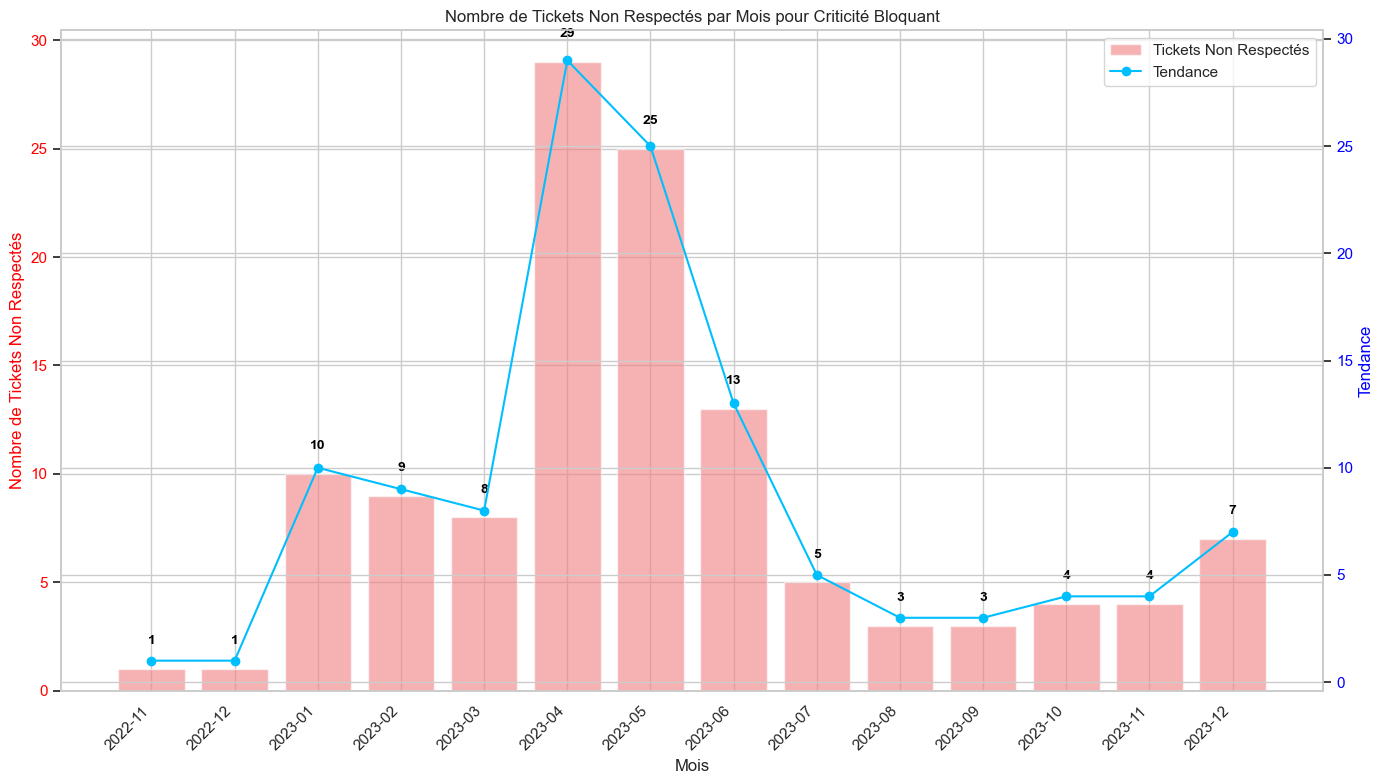

In [156]:
# Extract month and year from 'Date création'
Ticket_data['YearMonth'] = Ticket_data['Date création'].dt.to_period('M')

# Filter the tickets for criticity 'Bloquant'
bloquant_tickets = Ticket_data[Ticket_data['Criticité'] == 'Bloquant']

# Filter non-compliant tickets from the 'Bloquant' tickets
non_compliant_bloquant_tickets = bloquant_tickets[bloquant_tickets['SLA'] == 'Non respecté']

# Count non-compliant 'Bloquant' tickets by month
non_compliant_bloquant_by_month = non_compliant_bloquant_tickets['YearMonth'].value_counts().sort_index()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))
# Bar plot
ax1.bar(non_compliant_bloquant_by_month.index.astype(str), non_compliant_bloquant_by_month.values, color='lightcoral', alpha=0.6, label='Tickets Non Respectés')
ax1.set_xlabel('Mois')
ax1.set_ylabel('Nombre de Tickets Non Respectés', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('Nombre de Tickets Non Respectés par Mois pour Criticité Bloquant')
ax1.set_xticklabels(non_compliant_bloquant_by_month.index.astype(str), rotation=45, ha='right')

# Add annotations to the bars
for i in range(len(non_compliant_bloquant_by_month)):
    ax1.text(i, non_compliant_bloquant_by_month[i] + 1, str(non_compliant_bloquant_by_month[i]), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Line plot on the same x-axis
ax2 = ax1.twinx()  # Instantiate a second axis that shares the same x-axis
ax2.plot(non_compliant_bloquant_by_month.index.astype(str), non_compliant_bloquant_by_month.values, color='deepskyblue', marker='o', label='Tendance')
ax2.set_ylabel('Tendance', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Adjust the layout
fig.tight_layout()
plt.show()


### <span style="color:darkgreen">Interprétations des Résultats du graphe </span>

- La criticité Bloquant est particulièrement surveillée car elle affecte directement la qualité du service perçue par le client. 
1. **Analyse des Périodes Critiques** :
    - De novembre 2022 à janvier 2023, les tickets non respectés étaient relativement bas, mais une forte augmentation commence en février 2023.
    - Après le pic d'Avril 2023 environ 29 tickets non respectés, il y a une tendance à la baisse jusqu'à juillet 2023, suivi d'une légère stabilisation entre août et novembre 2023.
    - Une légère hausse est de nouveau observée en décembre 2023.

3. **Actions et Recommandations** :
    - **Investigation des Pics** : Le pic d'Avril et Main 2023 doit être investigué pour comprendre les causes sous-jacentes et prévenir de telles occurrences à l'avenir.
    - **Préparation pour les Périodes de Fin d'Année** : La légère hausse en décembre 2023 pourrait indiquer des défis saisonniers ou des charges de travail accrues, suggérant la nécessité de stratégies proactives pour gérer ces périodes.

#### <span style="color:purple">3. Respect des SLA par catégorie client :</span>

In [157]:
# Filtrer les données pour les tickets avec criticité "Bloquant"
bloquant_data = Ticket_data[Ticket_data['Criticité'] == 'Bloquant']

# Agréger les données pour le pie chart
pie_data = bloquant_data.groupby(['Catég', 'SLA']).size().reset_index(name='counts')

# Préparer les données pour le pie chart
labels = [f'{category}, {status}' for category, status in zip(pie_data['Catég'], pie_data['SLA'])]
sizes = pie_data['counts']  # Tailles pour chaque segment

# Créer le pie chart avec Plotly
fig = px.pie(pie_data, values='counts', names=labels, title='Respect SLA par Categorie pour (Criticité Bloquant)',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Améliorer la mise en page et l'apparence
fig.update_traces(textinfo='percent+label', pull=[0.1 for _ in labels], marker=dict(line=dict(color='#000000', width=2)))

# Afficher le pie chart
fig.show()

### <span style="color:darkgreen">Interprétations des Résultats du graphe : </span>

#### **Analyse du Respect du SLA par Catégorie pour Criticité Bloquant**

1. **Haute Conformité SLA pour les Clients Premium :**
   - La majorité des tickets pour les clients Premium respectent les SLA, avec 1561 tickets conformes (65.3% du total). Cela montre que les engagements de service pour les clients Premium sont largement respectés, ce qui est crucial pour maintenir la satisfaction et la fidélité de cette catégorie de clients.

2. **Meilleure Conformité pour les Clients Standard :**
   - Pour les clients Standard, bien que leur volume de tickets soit inférieur, ils affichent également une bonne conformité SLA, avec 709 tickets respectés (29.6% du total). Cela indique que même avec des engagements de service différents, Orange parvient à maintenir un bon niveau de service.

3. **Tickets Non Conformes :**
   - Une proportion notable de tickets n'ont pas respecté les SLA pour les deux catégories, bien que le nombre soit relativement faible comparé aux tickets conformes. Il y a 105 tickets Premium et 17 tickets Standard non conformes. Cela souligne l'importance continue d'améliorer les processus pour garantir le respect des SLA et réduire ces exceptions.
   
   Le fait que la majorité des tickets soient conformes pour cette criticité renforce la confiance des clients dans la capacité d'Orange à gérer les incidents critiques efficacement.

5. **Focus sur l'Amélioration Continue :**
   - Bien que les résultats soient globalement positifs, il reste des marges d'amélioration. Les tickets non conformes doivent être analysés pour identifier les causes racines et mettre en place des mesures correctives afin d'améliorer encore le respect des SLA.

#### <span style="color:purple">4. Respect des SLA par service :</span>

In [158]:
# Compter le nombre de tickets respectant ou non le SLA par service pour les tickets de criticité "Bloquant"
sla_respecte_counts_serv = bloquant_data.groupby(['Service', 'SLA']).size().unstack().fillna(0)

# Définir les couleurs pour chaque catégorie (SLA respecté ou non)
colors = ['#67ff66', '#ff6666']  # Vert pour "Respecté" et Rouge pour "Non respecté"

# Création des barres côte à côte
fig = go.Figure()

# Ajouter les barres pour les SLA respectés
fig.add_trace(go.Bar(
    x=sla_respecte_counts_serv.index,
    y=sla_respecte_counts_serv['Respecté'],
    name='Respecté',
    marker_color=colors[0],
    text=sla_respecte_counts_serv['Respecté'],
    textposition='outside'
))

# Ajouter les barres pour les SLA non respectés
fig.add_trace(go.Bar(
    x=sla_respecte_counts_serv.index,
    y=sla_respecte_counts_serv['Non respecté'],
    name='Non respecté',
    marker_color=colors[1],
    text=sla_respecte_counts_serv['Non respecté'],
    textposition='outside'
))

# Mise en page du graphique
fig.update_layout(
    title={
        'text': 'Respect SLA par service pour criticité Bloquant',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Service',
        tickmode='linear'
    ),
    yaxis=dict(
        title='Nombre de tickets'
    ),
    barmode='group',
    bargap=0.2,
    bargroupgap=0.1,
    legend_title_text='SLA ',
    template='plotly_white'
)

fig.show()

### <span style="color:darkgreen">Interprétations des Résultats du graphe </span>

- Ces résultats montrent que les services fournis par Orange sont globalement fiables, avec une majorité de tickets respectant les SLA pour les incidents critiques. Cependant, il est crucial de continuer à surveiller et améliorer les services DATA et INTERNET, afin de maintenir et améliorer la satisfaction des clients B2B.

#### <span style="color:purple">5. Etude de causes du non respect des SLA :</span>

In [159]:
# Votre mapping pour la normalisation des valeurs
mapping = {
    'Aucune anomalie côté Orange : Environnement client': 'Aucune anomalie côté Orange',
    'Aucune anomalie côté Orange : Autres': 'Aucune anomalie côté Orange',
    'Aucune anomalie côté Orange : Configuration client': 'Aucune anomalie côté Orange',
    'Aucune anomalie côté Orange : Assistance': 'Aucune anomalie côté Orange',
    'Customer Permises Equipment : Problème Software': 'Customer Premises Equipment',
    'Customer Permises Equipment : Problème Hardware': 'Customer Premises Equipment',
    'Customer Permises Equipment : Autres': 'Customer Premises Equipment',
    'Customer Permises Equipment : Anomalie Configuration': 'Customer Premises Equipment',
    'Customer Permises Equipment : Connectique Orange': 'Customer Premises Equipment',
    'Customer Permises Equipment : Problème SOFTWARE': 'Customer Premises Equipment',
    'Accès Last Mile : TDLTE': 'Accès Last Mile',
    'Accès Last Mile : Environnement (Energie, Clim) farend': 'Accès Last Mile',
    'Accès Last Mile : FH PTP': 'Accès Last Mile',
    'Accès Last Mile : FO': 'Accès Last Mile',
    'Accès Last Mile : 3G /4G': 'Accès Last Mile',
    'Accès Last Mile : BLR': 'Accès Last Mile',
    'Accès Last Mile : Autres': 'Accès Last Mile',
    'Accès Last Mile : Partenaires': 'Accès Last Mile',
    'Accès Last Mile : FTTH': 'Accès Last Mile',
    'Core : FO backbone': 'Core',
    'Core : Routeur Backbone': 'Core',
    'Core : FH PTP Backhaul': 'Core',
    'Core : ISP / IGW': 'Core',
    'Core : IMS': 'Core',
    'Core : International': 'Core',
    'Core : Autres': 'Core',
    'Core : Equipement Trans': 'Core',
    'Action Planifiée : Mauvaise Manip Integration': 'Action Planifiée',
    'Action Planifiée : Migration de techno d’acces': 'Action Planifiée',
    'Action Planifiée : Installation client non achevée': 'Action Planifiée',
    'Action Planifiée : Autres': 'Action Planifiée',
    'Action Planifiée : Mauvaise Manip': 'Action Planifiée',
    'Action Planifiée : Site Farend désinstallé': 'Action Planifiée',
    'Autre type de cause': 'Autre',
    'AUTRE': 'Autre',
    'Acces ecare': 'Autre',
    'Liaisons Louées Internationales': 'Autre',
    'TDLTE/FTTH': 'Autre',
    'Core : Peers': 'Core'
}

# Assurez-vous que 'Famille de problème' est dans le dataframe Ticket_data
# Appliquer le mapping à la colonne 'Famille de problème'
Ticket_data['Famille de problème normalisée'] = Ticket_data['Famille de problème'].map(mapping).fillna(Ticket_data['Famille de problème'])

# Filtrer les données pour les tickets avec criticité "Bloquant"
bloquant_data = Ticket_data[Ticket_data['Criticité'] == 'Bloquant']
# Filtrer les tickets non conformes
non_compliant_tickets = bloquant_data[bloquant_data['SLA'] == 'Non respecté']
# Compter les occurrences de chaque cause normalisée
root_causes = non_compliant_tickets['Famille de problème normalisée'].value_counts()
# Convert to DataFrame for plotly
root_causes_df = root_causes.reset_index()
root_causes_df.columns = ['Root Cause related to', 'Count']
# Plot root causes for non-compliance periods using a pie chart with plotly
fig = px.pie(root_causes_df, values='Count', names='Root Cause related to', title='Causes Principales du Non-Respect des SLA (Criticité Bloquant)',
             color_discrete_sequence=px.colors.sequential.RdBu)
# Improve layout and appearance
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True, legend_title_text='Causes', title_x=0.5, height=700, width=1000)

fig.show()


In [160]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtrer les données pour 'Accès Last Mile' et 'Core'
last_mile_tickets = non_compliant_tickets[non_compliant_tickets['Famille de problème normalisée'] == 'Accès Last Mile']
core_tickets = non_compliant_tickets[non_compliant_tickets['Famille de problème normalisée'] == 'Core']

# Compter les occurrences de chaque cause détaillée dans 'Accès Last Mile'
detailed_causes_last_mile = last_mile_tickets['Famille de problème'].value_counts()

# Compter les occurrences de chaque cause détaillée dans 'Core'
detailed_causes_core = core_tickets['Famille de problème'].value_counts()

# Convert to DataFrame for plotly
detailed_causes_last_mile_df = detailed_causes_last_mile.reset_index()
detailed_causes_last_mile_df.columns = ['Detailed Problem Family', 'Number of Tickets']

detailed_causes_core_df = detailed_causes_core.reset_index()
detailed_causes_core_df.columns = ['Detailed Problem Family', 'Number of Tickets']

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=False, 
                    subplot_titles=('Accès Last Mile', 'Core'))

# Add bar charts
fig.add_trace(go.Bar(
    x=detailed_causes_last_mile_df['Number of Tickets'],
    y=detailed_causes_last_mile_df['Detailed Problem Family'],
    orientation='h',
    marker_color='rgba(55, 128, 191, 0.7)',
    marker_line_color='rgba(55, 128, 191, 1.0)',
    marker_line_width=1.5,
    name='Accès Last Mile'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=detailed_causes_core_df['Number of Tickets'],
    y=detailed_causes_core_df['Detailed Problem Family'],
    orientation='h',
    marker_color='rgba(50, 171, 96, 0.7)',
    marker_line_color='rgba(50, 171, 96, 1.0)',
    marker_line_width=1.5,
    name='Core'
), row=2, col=1)

# Update layout
fig.update_layout(
    title_text='Detailed Causes of SLA Non-Compliance for Criticité Bloquant',
    title_font_size=24,
    height=800, 
    width=1200,
    showlegend=False,
    template='plotly_white',
    title_x=0.5  # Center the main title
)

# Update titles and labels
fig.update_yaxes(title_text='Detailed Problem Family', row=1, col=1)
fig.update_yaxes(title_text='Detailed Problem Family', row=2, col=1)
fig.update_xaxes(title_text='Number of Tickets', row=1, col=1)
fig.update_xaxes(title_text='Number of Tickets', row=2, col=1)

fig.show()


### <span style="color:darkgreen">Interprétations Globale des Résultats </span>
#### <span style="color:purple">Pie chart </span>
- Le graphe en pie chart montre que la majorité des incidents de non-respect des SLA pour les tickets de criticité "Bloquant" proviennent de deux principales catégories : **Accès Last Mile** (61.5%) et **Core** (23.8%). Cela indique que plus de 85% des problèmes sont concentrés dans ces deux segments, mettant en évidence les domaines prioritaires pour les améliorations.
#### <span style="color:purple">Causes Détaillées pour "Accès Last Mile" </span>
- Le bar chart pour "Accès Last Mile" révèle que les principaux problèmes proviennent de la fibre optique (44 tickets), suivis des conditions environnementales (20 tickets) et des liaisons FH PTP (13 tickets). Ces insights montrent que les problèmes techniques liés aux infrastructures de connexion physique et aux conditions environnementales sont les plus fréquents.
#### <span style="color:purple">Causes Détaillées pour "Core" </span>
- Le bar chart pour "Core" indique que les problèmes majeurs sont liés à la fibre optique du backbone (18 tickets), suivis des routeurs Backbone (6 tickets) et des services ISP/IGW (4 tickets). Cela met en lumière les éléments critiques du réseau qui nécessitent une attention particulière pour améliorer la fiabilité du service.

Ces graphiques mettent en évidence que les efforts d'amélioration doivent se concentrer principalement sur les infrastructures **Accès Last Mile** et **Core** pour réduire les incidents de non-respect des SLA. En ciblant spécifiquement les problèmes récurrents liés à la fibre optique et aux conditions environnementales, Orange peut améliorer significativement la conformité des SLA et ainsi optimiser l'expérience client B2B.

## <span style="color:blue">Analyse des Données : Résiliation contrats </span>

#### <span style="color:darkgreen">Chargement et nettoyage des Données du Parc :</span>

In [161]:
# Charger le fichier Excel contenant les données de résiliation
churn_data = pd.read_excel(r'C:\Users\dell\Documents\Stage_2A_ORANGE\Extract_parc_fixe.xlsx')

# Supprimer les colonnes non pertinentes
churn_data = churn_data.drop(columns=[
    'TYPE_IDENTIF','COMPTE_CLIENT', 'NUM_CONTACT1', 'NUM_CONTACT2', 'NOM_SITE',
    'NOM_VILLE', 'NOM_QUARTIER', 'NOM_RUE', 'ADRESSE', 'CODE_PLAN', 'PLAN_TARIFAIRE', 'TYPE_LIGNE',
    'DEBIT', 'PAQUET', 'CIR_DOWN', 'CIR_UP', 'MIR_DOWN', 'MIR_UP','NUM_IDENTIF','RAISON_SOCIALE',
    'IP_FIXE', 'NDD', 'SEGMENT', 'FACTURATION', 'DATE_ACTIVATION', 'Unnamed: 33',
    'EMAIL','DUREE_CONTRAT','DATE_FIN_CONTRAT','DATE_RESILIATION'
])

# Définir les états d'intérêt pour la résiliation
etat_ligne_values = [
    'RESILIE', 'SUSPENSION ACTIVA', 'SUSPENSION ACTIVE',
    'ANNULATION TEMPORAIRE EN COURS', 'RESILIATION EN COURS',
    'ANNULATION EN COURS', 'SUSPENSION EN COURS'
]
# Filtrer le dataframe basé sur les états spécifiés
churn_data_filtered = churn_data[churn_data['ETAT_LIGNE'].isin(etat_ligne_values)].copy()

# Remplacer la colonne 'ETAT_LIGNE' par 'résiliation'
churn_data_filtered['résiliation'] = 'résilié'
churn_data_filtered.drop(columns=['ETAT_LIGNE'], inplace=True)
churn_data_filtered.rename(columns={'NUM_LIGNE_CONNEXION': 'ID'}, inplace=True)


#### <span style="color:darkgreen">Analyse descriptive: </span>

In [162]:
# Afficher les premières lignes pour vérification
print("\nPremières lignes du DataFrame :")
display(churn_data_filtered.head())
print(churn_data.info())


Premières lignes du DataFrame :


,TYPE_PRODUIT,ID,TYPE_CLIENT,résiliation
0,DATA,MD0000001,GRAND CLIENT,résilié
1,DATA,MD0000002,GRAND CLIENT,résilié
2,DATA,MD0000003,GRAND CLIENT MEDITEL,résilié
3,DATA,MD0000004,GRAND CLIENT MEDITEL,résilié
4,DATA,MD0000005,GRAND CLIENT MEDITEL,résilié


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268372 entries, 0 to 268371
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   TYPE_PRODUIT         268372 non-null  object
 1   NUM_LIGNE_CONNEXION  268372 non-null  object
 2   TYPE_CLIENT          268372 non-null  object
 3   ETAT_LIGNE           268372 non-null  object
dtypes: object(4)
memory usage: 8.2+ MB
None


## <span style="color:blue">Merging Dataframes</span>

- #### <span style="color:darkgreen">Ticket data et churn data </span>

In [163]:
# Fusionner les deux dataframes sur 'ID' 
merged_data = pd.merge(Ticket_data, churn_data_filtered[['ID', 'résiliation']], on='ID', how='left')

# Remplir les valeurs NaN dans la colonne 'résiliation' avec 'non résilié'
merged_data['résiliation'].fillna('non résilié', inplace=True)

# Afficher les premières lignes du dataframe fusionné pour vérification
display(merged_data.head())

# Afficher les dimensions du dataframe fusionné
print("Shape of merged data:", merged_data.shape)

,Date création,ID,Client,Catég,Criticité,Service,Durée de traitement (mn) OCEANE,Famille de problème,Détail problème,Engagement,Durée de traitement (h) OCEANE,SLA,YearMonth,Famille de problème normalisée,résiliation
0,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,0.000000,Respecté,2022-12,Aucune anomalie côté Orange,non résilié
1,2022-12-31 13:43:00,000014064,DAEDONG MOROCCO,STANDARD,Majeur,INTERNET,0,Aucune anomalie côté Orange : Autres,Autres,GTR HO 480 Lundi au Vendredi 8h à 18h,0.000000,Respecté,2022-12,Aucune anomalie côté Orange,non résilié
2,2022-12-30 09:04:00,MD0009642,BMCE BANK,PREMIUM,Bloquant,DATA,25,Accès Last Mile : TDLTE,Bug SW,GTR S1 240 24h/24 - 7j/7,0.416667,Respecté,2022-12,Accès Last Mile,non résilié
3,2023-01-02 08:55:00,MD0003955,CIH,PREMIUM,Majeur,DATA,42,Customer Permises Equipment : Problème Software,Routeur Cisco,GTR S1 240 24h/24 - 7j/7,0.700000,Respecté,2023-01,Customer Premises Equipment,non résilié
4,2022-12-29 15:05:00,MD0000914,SODEP (MARSA MAROC),STANDARD,Majeur,DATA,0,"Accès Last Mile : Environnement (Energie, Clim...","Energie, Clim",GTR HO 480 Lundi au Vendredi 8h à 18h,0.000000,Respecté,2022-12,Accès Last Mile,non résilié


Shape of merged data: (6265, 15)


#### <span style="color:purple">1.Résiliation mensuelle :</span>

<Figure size 1400x800 with 0 Axes>

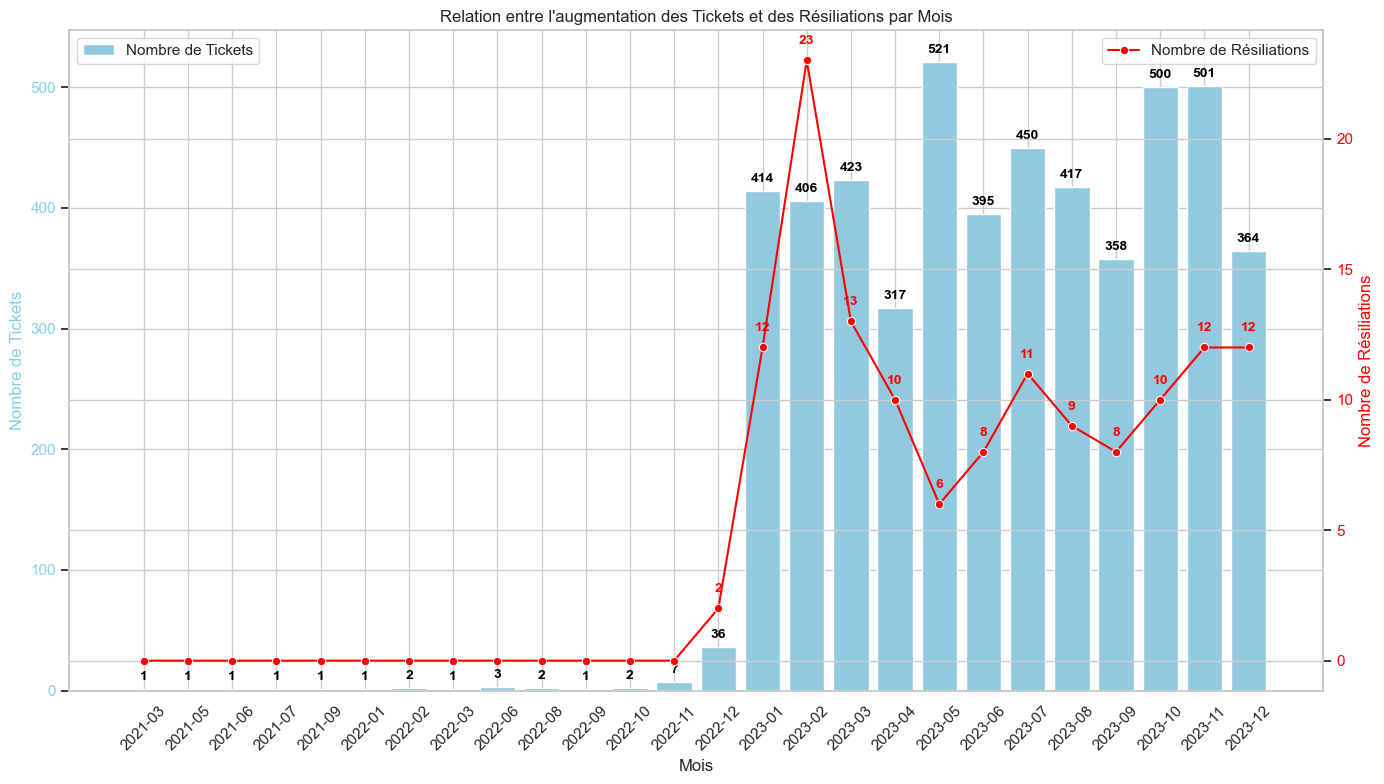

In [164]:
# Assurez-vous que 'Date création' est en datetime
merged_data['Date création'] = pd.to_datetime(merged_data['Date création'])

# Extraire le mois et l'année de 'Date création'
merged_data['YearMonth'] = merged_data['Date création'].dt.to_period('M')

# Supprimer les doublons en gardant la première occurrence par 'ID' et 'YearMonth'
unique_data = merged_data.drop_duplicates(subset=['ID', 'YearMonth'])

# Compter le nombre de résiliations et non-résiliations par mois
resiliation_counts = unique_data.groupby(['YearMonth', 'résiliation']).size().unstack(fill_value=0)

# Convertir en DataFrame pour une manipulation facile
resiliation_counts = resiliation_counts.reset_index()

# Melt the DataFrame for seaborn
resiliation_counts_melted = resiliation_counts.melt(id_vars='YearMonth', value_vars=['résilié', 'non résilié'],
                                                    var_name='Résiliation Status', value_name='Count')

# Convert 'YearMonth' to string for seaborn
resiliation_counts_melted['YearMonth'] = resiliation_counts_melted['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot pour le nombre total de tickets
sns.barplot(data=resiliation_counts_melted[resiliation_counts_melted['Résiliation Status'] == 'non résilié'],
            x='YearMonth', y='Count', color='skyblue', label='Nombre de Tickets', ax=ax1)

# Ajout des annotations sur les barres
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 5),
                     ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

ax1.set_ylabel('Nombre de Tickets', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot pour les résiliations
ax2 = ax1.twinx()
sns.lineplot(data=resiliation_counts_melted[resiliation_counts_melted['Résiliation Status'] == 'résilié'],
             x='YearMonth', y='Count', color='red', marker='o', label='Nombre de Résiliations', ax=ax2)

# Ajout des annotations sur les points de la ligne
for x, y in zip(resiliation_counts_melted[resiliation_counts_melted['Résiliation Status'] == 'résilié']['YearMonth'],
                resiliation_counts_melted[resiliation_counts_melted['Résiliation Status'] == 'résilié']['Count']):
    if y > 0:
        ax2.annotate(f'{int(y)}', (x, y + 0.5),
                     ha='center', va='bottom', color='red', fontsize=10, fontweight='bold')

ax2.set_ylabel('Nombre de Résiliations', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Configuration des labels et du titre
ax1.set_xlabel('Mois')
ax1.set_title("Relation entre l'augmentation des Tickets et des Résiliations par Mois")
ax1.set_xticklabels(resiliation_counts['YearMonth'].astype(str), rotation=45)
ax1.grid(True)

# Légende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


#### <span style="color:darkgreen">Interprétation </span>

Le graphique met en évidence une relation entre le nombre de tickets et le nombre de résiliations de contrats par mois. 

1. **Augmentation des Tickets à Partir de Décembre 2022** :
   - Une montée notable des tickets commence en décembre 2022, culminant en mai 2023 avec 527 tickets.
   - Cette tendance suggère des problèmes techniques ou opérationnels récurrents qui ont entraîné une augmentation des demandes de support.

2. **Pic de Résiliations en Février 2023** :
   - Le nombre de résiliations atteint son sommet en février 2023 avec 23 résiliations.
   - Ce pic de résiliations précède le pic des tickets et coincident avec un nombre de tickets aussi élévé (406), indiquant que les clients pourraient avoir commencé à ressentir des frustrations bien avant le point culminant des tickets.

3. **Fluctuations des Résiliations Après Février 2023** :
   - Bien que les résiliations diminuent après février 2023, elles restent volatiles, avec des nombres fluctuants au cours des mois suivants.
   - Les résiliations ne reviennent pas aux niveaux bas observés avant novembre 2022, suggérant une persistance des problèmes perçus par les clients.



#### <span style="color:purple">2. Statut de résiliation par service :</span>

In [165]:
# Supprimer les doublons en gardant la première occurrence par 'Service' et 'ID'
unique_service_data = merged_data.drop_duplicates(subset=['Service', 'ID'])

# Compter le nombre de résiliations et non-résiliations par service
service_resiliation_counts = unique_service_data.groupby(['Service', 'résiliation']).size().unstack(fill_value=0)

# Convertir en DataFrame pour une manipulation facile
service_resiliation_counts = service_resiliation_counts.reset_index()

# Melt the DataFrame for Plotly
service_resiliation_counts_melted = service_resiliation_counts.melt(id_vars='Service', value_vars=['résilié', 'non résilié'],
                                                                    var_name='Résiliation Status', value_name='Count')

# Create hover texts
service_resiliation_counts_melted['hover_text'] = service_resiliation_counts_melted.apply(
    lambda row: f"Service: {row['Service']}<br>Statut: {row['Résiliation Status']}<br>Nombre: {row['Count']}", axis=1)

# Create a bar plot with Plotly
fig = go.Figure()

# Ajouter les barres pour les résiliations
fig.add_trace(go.Bar(
    x=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'résilié']['Service'],
    y=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'résilié']['Count'],
    name='Résilié',
    marker_color='rgba(255, 99, 71, 0.5)',  # tomato color with opacity
    text=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'résilié']['Count'],
    textposition='outside',
    hovertext=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'résilié']['hover_text'],
    hoverinfo='text'
))

# Ajouter les barres pour les non résiliations
fig.add_trace(go.Bar(
    x=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'non résilié']['Service'],
    y=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'non résilié']['Count'],
    name='Non Résilié',
    marker_color='rgba(60, 179, 113, 0.5)',  # mediumseagreen color with opacity
    text=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'non résilié']['Count'],
    textposition='outside',
    hovertext=service_resiliation_counts_melted[service_resiliation_counts_melted['Résiliation Status'] == 'non résilié']['hover_text'],
    hoverinfo='text'
))

# Update layout for better appearance
fig.update_layout(
    barmode='group',
    title='Nombre de Résiliations et Non-Résiliations par Service',
    xaxis_title='Service',
    yaxis_title='Count',
    template='plotly_white',
    title_x=0.5,
    legend_title_text='Statut de Résiliation',
    height=600,
    width=1000,
    bargap=0.2,  # space between bars
    bargroupgap=0.1  # space between groups of bars
)

# Show the figure
fig.show()


## <span style="color:darkgreen">Interpétation :</span>
- les données indiquent que le **Service DATA** nécessite une attention particulière pour réduire les résiliations, tandis que les services **INTERNET** et **VOIX** affichent des performances satisfaisantes en termes de rétention des clients.

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Filtrer les données pour le service DATA et les résiliations
data_resiliations = merged_data[(merged_data['Service'] == 'DATA') & (merged_data['résiliation'] == 'résilié')]

# Analyser les causes des problèmes
cause_counts = data_resiliations['Famille de problème normalisée'].value_counts().reset_index()
cause_counts.columns = ['Cause', 'Count']

# Visualisation avec Plotly
fig = px.bar(cause_counts, x='Cause', y='Count', title='Causes des Résiliations pour le Service DATA', color='Count', color_continuous_scale='Blues')
fig.update_layout(
    xaxis_title='Causes des Problèmes',
    yaxis_title='Nombre de Résiliations',
    title_x=0.5,
    template='plotly_white'
)
fig.show()


## <span style="color:darkgreen">Interpretation </span>
**Aucune anomalie côté Orange** : La majorité des résiliations (plus de 100) sont attribuées à des problèmes où aucune anomalie n'a été détectée du côté d'Orange. Cela peut indiquer une insatisfaction des clients malgré l'absence de défaillance technique identifiée par Orange, suggérant peut-être des attentes non satisfaites ou des problèmes non techniques .Une meilleure communication avec les clients sur les diagnostics et les résolutions est essentielle.

**Accès Last Mile** : Une autre cause notable de résiliation est liée à des problèmes d'accès "Last Mile" avec environ 40 résiliations. Cela pourrait indiquer des problèmes dans la connexion finale entre le réseau principal d'Orange et les clients, souvent critique pour la qualité de service perçue.


#### <span style="color:purple">3. Relation entre STATUT SLA et Résiliation:</span>

In [175]:
import pandas as pd
import plotly.graph_objects as go

# Filtrer les données pour la criticité "Bloquant"
bloquant_data = merged_data[merged_data['Criticité'] == 'Bloquant']

# Vérifier les comptages de SLA respecté et non respecté pour chaque ID dans bloquant_data
sla_counts = bloquant_data.pivot_table(index='ID', columns='SLA', aggfunc='size', fill_value=0)
sla_counts.columns = ['Non_Respecté', 'Respecté']

# Refaire l'analyse et la visualisation avec les comptages vérifiés
id_resiliation = bloquant_data.groupby('ID')['résiliation'].agg(lambda x: x.mode()[0])
id_analysis = sla_counts.join(id_resiliation)

# Regrouper les données par 'résiliation'
grouped_data = id_analysis.groupby('résiliation').sum().reset_index()

# Préparer les données pour la heatmap
heatmap_data = grouped_data.melt(id_vars='résiliation', value_vars=['Respecté', 'Non_Respecté'],
                                 var_name='Statut SLA', value_name='Nombre')

# Création de la heatmap avec des nuances de rose
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data['Nombre'],
    x=heatmap_data['résiliation'],
    y=heatmap_data['Statut SLA'],
    colorscale='Reds',  # Utilisation de la palette de couleurs 'Reds' pour des nuances de rose
    text=heatmap_data['Nombre'],
    texttemplate="%{text}",
    textfont={"size":12},
    hovertemplate='Résiliation: %{x}<br>Statut SLA: %{y}<br>Nombre: %{z}<extra></extra>',
    showscale=True
))

# Mise à jour de la mise en page
fig.update_layout(
    title={
        'text': "Relation entre STATUT SLA et Résiliation",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(title='Etat de Résiliation'),
    yaxis=dict(title='Statut du SLA'),
    template='plotly_white',
    width=800,
    height=400
)

# Affichage de la heatmap
fig.show()

### <span style="color:darkgreen">Interprétation du graphe :</span>
<p style="font-size: 16px; line-height: 1.6;">
  <strong>Le respect du SLA</strong> semble avoir une influence significative sur la rétention des clients, comme le montre le grand nombre de clients dont les tickets ont respecté le SLA et qui n'ont pas résilié.
</p>
<p style="font-size: 16px; line-height: 1.6;">
  La <strong>non-résiliation malgré le non-respect du SLA</strong> chez certains clients suggère que d'autres facteurs jouent un rôle dans la décision de résiliation.
</p>
<p style="font-size: 16px; line-height: 1.6;">
  Il serait intéressant d'explorer ces autres facteurs et de comprendre pourquoi certains clients résilient malgré le respect du SLA, ainsi que pourquoi certains restent malgré le non-respect du SLA, des enquetes de satisfaction trimestrielle ou semestrielle peuvent aider dans ce point . 
</p>


- ## <span style="color:darkgreen">Merging avec Availability_data : </span>

In [173]:

# Fusionner les données sur la colonne 'ID'
combined_data = pd.merge(merged_data, availability_data, on='ID', how='inner')

# Afficher les premières lignes du dataframe fusionné pour vérifier
display(combined_data.head())


,Date création,ID,Client,Catég,Criticité,Service,Durée de traitement (mn) OCEANE,Famille de problème,Détail problème,Engagement,...,YearMonth,Famille de problème normalisée,résiliation,Date,Node ID,Node,IP Address,Availability,Client Name,Average Availability
0,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,...,2022-12,Aucune anomalie côté Orange,non résilié,juillet 2023,4040,BMCE_CASA_MROCO_MALL_IPVPN_1M_MD0001996,10.160.127.176,99.94,BMCE_CASA_MROCO_MALL_IPVPN_1M_,99.923333
1,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,...,2022-12,Aucune anomalie côté Orange,non résilié,août 2023,4040,BMCE_CASA_MROCO_MALL_IPVPN_1M_MD0001996,10.160.127.176,99.93,BMCE_CASA_MROCO_MALL_IPVPN_1M_,99.923333
2,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,...,2022-12,Aucune anomalie côté Orange,non résilié,septembre 2023,4040,BMCE_CASA_MROCO_MALL_IPVPN_1M_MD0001996,10.160.127.176,99.75,BMCE_CASA_MROCO_MALL_IPVPN_1M_,99.923333
3,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,...,2022-12,Aucune anomalie côté Orange,non résilié,octobre 2023,4040,BMCE_CASA_MROCO_MALL_IPVPN_1M_MD0001996,10.160.127.176,99.92,BMCE_CASA_MROCO_MALL_IPVPN_1M_,99.923333
4,2022-12-31 14:15:00,MD0001996,BMCE BANK,PREMIUM,Bloquant,DATA,0,Aucune anomalie côté Orange : Environnement cl...,Energie & Clim,GTR S1 240 24h/24 - 7j/7,...,2022-12,Aucune anomalie côté Orange,non résilié,novembre 2023,4040,BMCE_CASA_MROCO_MALL_IPVPN_1M_MD0001996,10.160.127.176,100.00,BMCE_CASA_MROCO_MALL_IPVPN_1M_,99.923333


In [193]:
import plotly.express as px
import plotly.graph_objects as go

# Calculer la disponibilité moyenne par service
availability_mean_by_service = combined_data.groupby('Service')['Average Availability'].mean().reset_index()

# Spécifier les couleurs plus claires pour chaque barre
colors = ['lightblue', 'green', 'lightgreen']

# Créer un bar plot avec Plotly
fig = go.Figure()

for i, row in availability_mean_by_service.iterrows():
    fig.add_trace(go.Bar(
        x=[row['Service']],
        y=[row['Average Availability']],
        name=row['Service'],
        marker_color=colors[i % len(colors)]  # Utiliser une couleur différente pour chaque barre
    ))

# Mise à jour de la mise en page pour une meilleure présentation
fig.update_layout(
    title='Disponibilité Moyenne par Service',
    xaxis_title='Service',
    yaxis_title='Disponibilité Moyenne (%)',
    title_x=0.5,
    template='plotly_white',
    showlegend=False
)

# Afficher le plot
fig.show()

In [206]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Calculer la disponibilité moyenne pour chaque ID
availability_mean = availability_data.groupby('ID').mean().reset_index()

# Calculer le pourcentage de respect du SLA pour chaque ID
sla_counts = merged_data.groupby('ID')['SLA'].value_counts().unstack().fillna(0)
sla_counts['Total Tickets'] = sla_counts.sum(axis=1)
sla_counts['Respecté'] = sla_counts.get('Respecté', 0)
sla_counts['SLA Percentage'] = (sla_counts['Respecté'] / sla_counts['Total Tickets']) * 100

# Fusionner avec les données de résiliation
availability_sla_resiliation_data = pd.merge(availability_mean, sla_counts[['SLA Percentage']], on='ID', how='inner')
availability_sla_resiliation_data = pd.merge(availability_sla_resiliation_data, merged_data[['ID', 'résiliation']].drop_duplicates(), on='ID', how='inner')

# Définir les critères de satisfaction
high_availability_threshold = 95  # Par exemple, 95%
sla_threshold = 80  # Par exemple, 80%

def determine_satisfaction(row):
    if row['Availability'] >= high_availability_threshold and row['SLA Percentage'] >= sla_threshold and row['résiliation'] == 'non résilié':
        return 'Satisfait'
    else:
        return 'Insatisfait'

availability_sla_resiliation_data['Satisfaction'] = availability_sla_resiliation_data.apply(determine_satisfaction, axis=1)

# Afficher les premières lignes du dataframe pour vérifier
display(availability_sla_resiliation_data.head())

# Visualiser la satisfaction globale des clients avec Plotly
fig = px.bar(availability_sla_resiliation_data['Satisfaction'].value_counts().reset_index(),
             x='index', y='Satisfaction', color='index',
             labels={'index': 'Satisfaction', 'Satisfaction': 'Nombre de Clients'},
             title='Satisfaction Globale des Clients pour un semestre de 2023 ')

fig.update_layout(
    xaxis_title='Satisfaction',
    yaxis_title='Nombre de Clients',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

# Agréger les données pour le pie chart
satisfaction_counts = availability_sla_resiliation_data['Satisfaction'].value_counts().reset_index(name='counts')

# Préparer les données pour le pie chart
labels = satisfaction_counts['index']
sizes = satisfaction_counts['counts']

# Créer le pie chart avec Plotly
fig = px.pie(satisfaction_counts, values='counts', names=labels, title='Pourcentage de satisfaction des Clients',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Améliorer la mise en page et l'apparence
fig.update_traces(textinfo='percent+label', pull=[0.1 if label == 'Insatisfait' else 0 for label in labels], 
                  marker=dict(line=dict(color='#000000', width=2)), 
                  textfont_size=15, textposition='inside')

# Centrer le titre et améliorer la mise en page
fig.update_layout(
    title={
        'text': 'Pourcentage de satisfaction des Clients',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=20,
    legend_title_text='Satisfaction',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(t=50, b=50, l=50, r=50)
)

# Afficher le pie chart
fig.show()



C:\Users\dell\AppData\Local\Temp\ipykernel_2360\1731344505.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,ID,Node ID,Availability,Average Availability,SLA Percentage,résiliation,Satisfaction
0,000001081,9893.0,96.502000,96.502000,0.0,non résilié,Insatisfait
1,000001509,6826.0,97.178333,97.178333,100.0,non résilié,Satisfait
2,000002412,17147.0,98.505000,98.505000,100.0,non résilié,Satisfait
3,000002505,19197.0,96.012000,96.012000,100.0,non résilié,Satisfait
4,000002561,3782.0,99.993333,99.993333,100.0,non résilié,Satisfait


### <span style="color:darkgreen">Interprétation du graphe :</span>
**Taux de Satisfaction Élevé**: Avec 73.5% des clients satisfaits, il est clair que la plupart des clients trouvent le service adéquat et répondant à leurs attentes.

**Segment des Clients Insatisfaits**: Bien que minoritaire, le segment des clients insatisfaits (26.5%) représente une opportunité d'amélioration.
## <span style="color:red">Conclusion :</span>
J'ai analysé les points de faiblesse et l'overalle client experience en identifiant sa satisfaction ,comme solution d'amélioration je recommande:

**Programme de Rétention des Clients par analyse Prédictive** :
   - Utiliser des outils d'analyse prédictive pour identifier les clients à risque de résiliation . Cela permettra de cibler ces clients avec des offres et des incitations personnalisées pour les retenir. En outre, cette approche aidera à planifier efficacement et à allouer les ressources nécessaires pour répondre aux besoins spécifiques de ces clients, réduisant ainsi les taux de résiliation et améliorant la satisfaction client.
